In [1]:
!pip install deepface
!pip install tensorflow keras opencv-python



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (160, 160)  # FaceNet uses 160x160 images
BATCH_SIZE = 32

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

# Load dataset with labels
train_generator = datagen.flow_from_directory(
    r"D:\app\dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    r"D:\app\dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Number of classes (people)
num_classes = len(train_generator.class_indices)
print(f"Total Classes (People): {num_classes}")


Found 766 images belonging to 20 classes.
Found 188 images belonging to 20 classes.
Total Classes (People): 20


In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
# Load MobileNetV2 as a feature extractor
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze base layers

# Build model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,192,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,455,380 (39.88 MB)

 Trainable params: 8,197,396 (31.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [4]:
# Train model
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2907 - loss: 9.4918 - val_accuracy: 0.7872 - val_loss: 0.8008
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 810ms/step - accuracy: 0.6829 - loss: 1.0529 - val_accuracy: 0.8404 - val_loss: 0.5374
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 771ms/step - accuracy: 0.7482 - loss: 0.7121 - val_accuracy: 0.8404 - val_loss: 0.5032
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 916ms/step - accuracy: 0.8563 - loss: 0.4814 - val_accuracy: 0.8511 - val_loss: 0.5364
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 883ms/step - accuracy: 0.8764 - loss: 0.3845 - val_accuracy: 0.8777 - val_loss: 0.5055
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 776ms/step - accuracy: 0.8823 - loss: 0.3272 - val_accuracy: 0.8670 - val_loss: 0.3940
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9201 - loss: 0.2887 - val_accuracy: 0.9096 - val_loss: 0.3418
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 791ms/step - accuracy: 0.9058 - loss: 0.2751 - val_accuracy: 

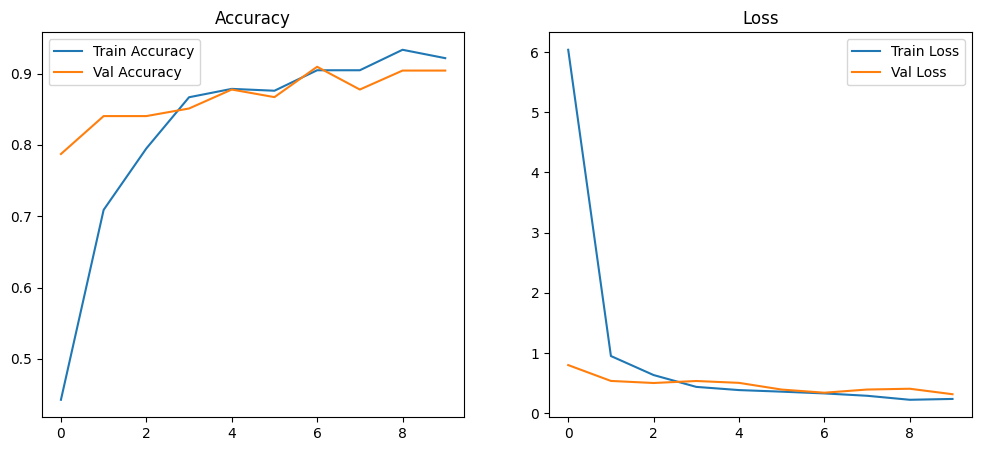

In [5]:
import matplotlib.pyplot as plt

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [8]:
# Train model
EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 932ms/step - accuracy: 0.9033 - loss: 0.2736 - val_accuracy: 0.8830 - val_loss: 0.4447
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 821ms/step - accuracy: 0.8994 - loss: 0.3307 - val_accuracy: 0.8617 - val_loss: 0.4122
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 828ms/step - accuracy: 0.8803 - loss: 0.3449 - val_accuracy: 0.9202 - val_loss: 0.2816
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 821ms/step - accuracy: 0.9204 - loss: 0.1981 - val_accuracy: 0.8936 - val_loss: 0.4076
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 815ms/step - accuracy: 0.8911 - loss: 0.2965 - val_accuracy: 0.9096 - val_loss: 0.4141
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 811ms/step - accuracy: 0.9273 - loss: 0.2371 - val_accuracy: 0.9255 - val_loss: 0.2464
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9227 - loss: 0.2238 - val_accuracy: 0.9043 - val_loss: 0.4010
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 769ms/step - accuracy: 0.9126 - loss: 0.2661 - val_accurac

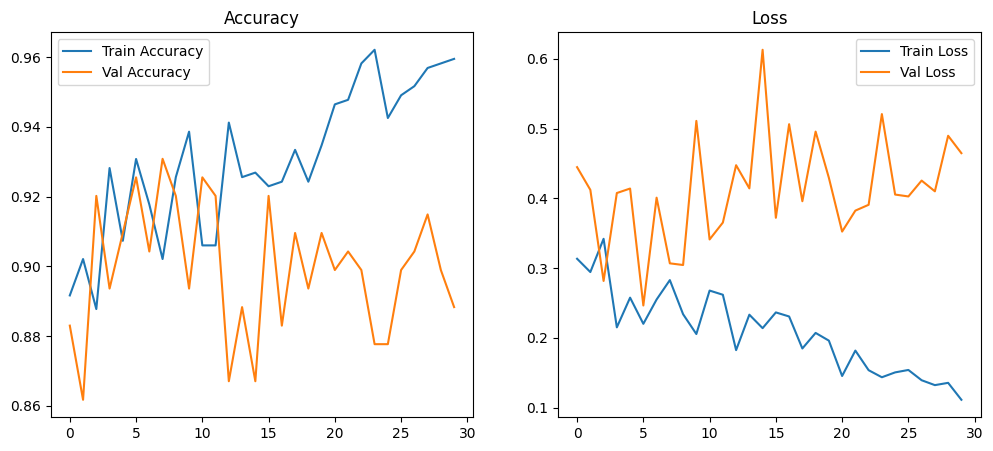

In [9]:
import matplotlib.pyplot as plt

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [6]:
#saving the model
from tensorflow.keras.models import load_model

# Load the model without worrying about the warning
model = load_model("face_recognition_model.keras")

# Recompile the model with the latest optimizer
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [7]:
#checking the model
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model(r"D:\app\face_recognition_model.keras")

# Define image size (must match the training size)
IMG_SIZE = (160, 160)

# Get class labels from the training generator
class_labels = list(train_generator.class_indices.keys())

def predict_frame(frame):
    """Preprocess the frame and make a prediction"""
    img = cv2.resize(frame, IMG_SIZE)  # Resize to match the model input
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize and add batch dimension
    prediction = model.predict(img)  # Predict class
    predicted_class = np.argmax(prediction)  # Get class index
    return class_labels[predicted_class]  # Return class name

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()  # Read frame from camera
    if not ret:
        break

    # Make a prediction
    predicted_person = predict_frame(frame)

    # Display prediction on the frame
    cv2.putText(frame, f"Predicted: {predicted_person}", (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Real-Time Face Recognition", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image size and batch size
IMG_SIZE = (160, 160)  
BATCH_SIZE = 32  

# Path to dataset containing 3 folders (one for each person)
dataset_path = r"D:\app\dataset3"

# Define class labels (Assuming folder names are person names)
class_labels = os.listdir(dataset_path)  # E.g., ["Person1", "Person2", "Person3"]
class_labels.sort()  # Ensure consistency in labeling

# Load images and labels
images = []
labels = []

# Read all images from each person's folder
for label_index, person_name in enumerate(class_labels):
    person_folder = os.path.join(dataset_path, person_name)
    for filename in os.listdir(person_folder):
        img_path = os.path.join(person_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)  # Resize image
            img = np.array(img, dtype=np.float32) / 255.0  # Normalize image
            images.append(img)
            labels.append(label_index)  # Assign label index (0, 1, 2)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# 🔹 Ensure correct image shape (N, 160, 160, 3)
print(f"Image Shape Before Reshaping: {images.shape}")  

# 🔹 Convert labels to categorical (One-hot encoding)
labels = to_categorical(labels, num_classes=len(class_labels))  # Shape: (N, 3)

# Split into training and validation
split = int(0.8 * len(images))
X_train, X_val = images[:split], images[split:]
y_train, y_val = labels[:split], labels[split:]

# 🔹 Print dataset shapes
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")  # (N, 160, 160, 3) and (N, 3)
print(f"X_val Shape: {X_val.shape}, y_val Shape: {y_val.shape}")

# Build a CNN model for multi-class classification
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(160, 160, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(len(class_labels), activation="softmax")  # Output layer with 3 classes
])

# Compile model with categorical loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=BATCH_SIZE)

# Save trained model
model.save("person_model.keras")
print("Model Trained Successfully!")


Image Shape Before Reshaping: (144, 160, 160, 3)
X_train Shape: (115, 160, 160, 3), y_train Shape: (115, 3)
X_val Shape: (29, 160, 160, 3), y_val Shape: (29, 3)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 963ms/step - accuracy: 0.3051 - loss: 2.4667 - val_accuracy: 0.8621 - val_loss: 0.8628
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3961 - loss: 1.0356 - val_accuracy: 1.0000 - val_loss: 0.9121
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 869ms/step - accuracy: 0.8909 - loss: 0.8815 - val_accuracy: 0.0000e+00 - val_loss: 1.3167
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 820ms/step - accuracy: 0.8520 - loss: 0.5926 - val_accuracy: 1.0000 - val_loss: 0.5037
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 754ms/step - accuracy: 1.0000 - loss: 0.2783 - val_accuracy: 1.0000 - val_loss: 0.2486
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 825ms/step - accuracy: 1.0000 - loss: 0.0968 - val_accuracy: 1.0000 - val_loss: 0.0900
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 836ms/step - accuracy: 1.0000 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 0

In [2]:
import cv2
import numpy as np
import time
import pandas as pd
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r"c:\Users\user\OneDrive\Desktop\priyanshi\major_project_hcst\person_model.keras")

# Constants
IMG_SIZE = (160, 160)
PERSON_NAME = ""
ATTENDANCE_FILE = "attendance.xlsx"

# Tracking attendance scans
scan_count = 0  # Counts total scans for the person
scan_interval = 20  # Time (seconds) between scans
max_scans = 3  # Stop after 3 scans
last_scan_time = time.time()

# Load or create attendance sheet
try:
    attendance_df = pd.read_excel(ATTENDANCE_FILE)
except FileNotFoundError:
    attendance_df = pd.DataFrame(columns=["Name", "Date", "Time", "Scans"])

def predict_frame(frame):
    """Preprocess the frame and make a prediction"""
    img = cv2.resize(frame, IMG_SIZE)
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize
    prediction = model.predict(img)[0][0]  # Binary classification

    return PERSON_NAME if prediction > 0.5 else "Unknown"

def mark_attendance(name):
    """Mark attendance in the Excel sheet"""
    now = time.strftime("%Y-%m-%d %H:%M:%S")
    
    # Save attendance to Excel
    new_entry = pd.DataFrame({"Name": [name], "Date": [now.split()[0]], "Time": [now.split()[1]], "Scans": [3]})
    global attendance_df
    attendance_df = pd.concat([attendance_df, new_entry], ignore_index=True)
    attendance_df.to_excel(ATTENDANCE_FILE, index=False)
    
    print(f"✅ Attendance marked for {name} at {now}")

# Open webcam
cap = cv2.VideoCapture(0)

while scan_count < max_scans:  # Ensures loop stops after 3 scans
    ret, frame = cap.read()
    if not ret:
        break

    detected_person = predict_frame(frame)
    current_time = time.time()

    if detected_person == PERSON_NAME:
        # Check if 20 seconds have passed since last scan
        if (current_time - last_scan_time) >= scan_interval:
            scan_count += 1
            last_scan_time = current_time
            print(f"🔹 {detected_person} scanned {scan_count} times")

        # Stop webcam after 3 scans
        if scan_count == max_scans:
            mark_attendance(detected_person)
            print("🚨 Maximum scans reached. Stopping webcam...")
            break  # Stop the webcam loop

    # Display detected person on screen
    cv2.putText(frame, f"Detected: {detected_person}", (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Real-Time Face Recognition", frame)

    # Press 'q' to exit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources after 3 scans
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━